In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import sys
import os
if "../" not in sys.path:
  sys.path.append("../") 
import os
os.chdir("..") 
from envs.data_handler import DataHandler
import envs.data_utils as du

# Non-stationary data generation

In [2]:
def create_datafile_name(model, component_id, transformation, distinguishable):
    component_identifier = '_id' if component_id else ''
    dist = '_dist' if distinguishable else ''
    return 'data/prepared_data/' + model + component_identifier + '_' + transformation + dist + '.csv'

def create_non_stationary_data(model, dist=False):
    trans = ['raw', 'cube', 'sqt', 'log10', 'ln', 'log2']
    for t in trans:
        print('Generating for ' + t)
        dh = DataHandler(data_generation='LinearShifted', take_component_id=True, transformation=t, distinguishable=dist)
        non_stationary_data_ARCH = du.create_non_stationary_data(model, dh.data)
        non_stationary_data_ARCH.to_csv(create_datafile_name(model, True, t, dist))

## ARol
Create non-stationary data using the AR Model with a Ornstein–Uhlenbeck procedure model. A series value $x$ at time point $t$ for a <component,failure> group is calculated by:
\begin{align}
x_{t} = x_{t-1} + 0.1 * (\mu * x_{t-1}) + rand(\mathcal{N}))
\end{align}
where $\mu$ is the mean of <component,failure> and $rand(\mathcal{N})$ is a random value from a normal distribution.


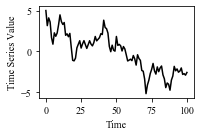

In [17]:
y = du.ARol(5, 0, 100)
x = range(len(y)) 
plt.figure(figsize=[3, 2])
plt.plot(x, y, color='black')
plt.xlabel('Time')
plt.ylabel('Time Series Value')
plt.tight_layout()
plt.savefig('data_analysis/04_plots/ARol_example.pdf') 

  0%|          | 0/915 [00:00<?, ?it/s]

Generating for raw


100%|██████████| 915/915 [02:25<00:00,  6.28it/s]


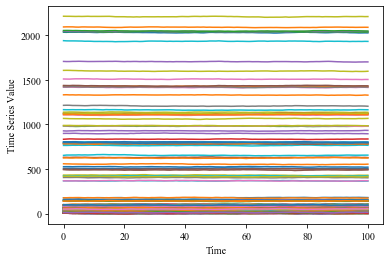

  0%|          | 1/915 [00:00<01:37,  9.35it/s]

Generating for cube


100%|██████████| 915/915 [02:22<00:00,  6.43it/s]


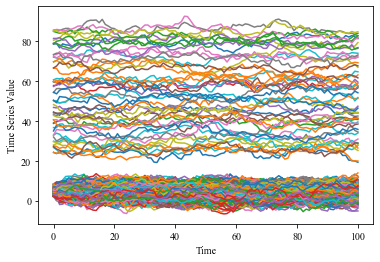

  0%|          | 1/915 [00:00<01:42,  8.89it/s]

Generating for sqt


100%|██████████| 915/915 [02:22<00:00,  6.40it/s]


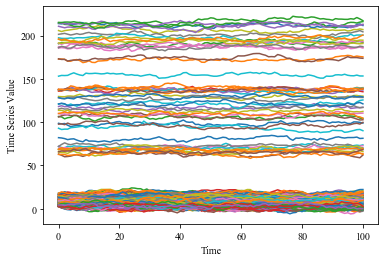

  0%|          | 1/915 [00:00<01:44,  8.73it/s]

Generating for log10


100%|██████████| 915/915 [02:25<00:00,  6.27it/s]


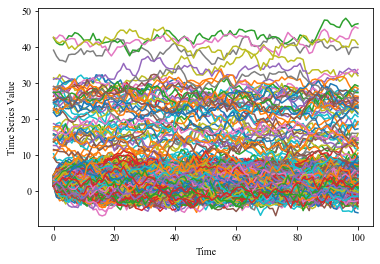

  0%|          | 1/915 [00:00<01:53,  8.08it/s]

Generating for ln


100%|██████████| 915/915 [02:22<00:00,  6.44it/s]


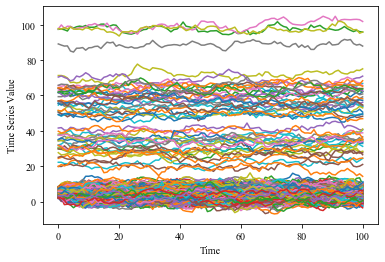

  0%|          | 1/915 [00:00<01:42,  8.88it/s]

Generating for log2


100%|██████████| 915/915 [02:23<00:00,  6.38it/s]


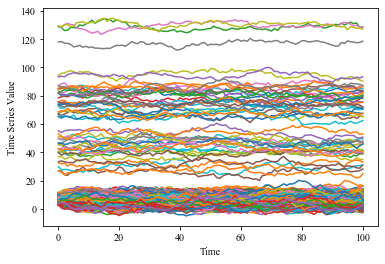

In [4]:
create_non_stationary_data('ARol')

## GARCH
Create non-stationary data using the GARCH model. A series value $x$ at time point $t$ for a <component,failure> group is calculated by:
\begin{align}
x_{t} = n_{t} * \sqrt{ 0.1 + (0.0001 * x_{t-1}^2) + (0.1 * n_{t-1}^2)} + mean_{<component,failure>}
\end{align}

where $n$ is white noise in form of a normal distribution.

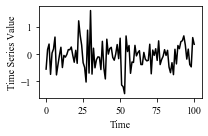

In [18]:
y = du.GARCH(0, 100)
x = range(len(y)) 
plt.figure(figsize=[3, 2])
plt.plot(x, y, color='black')
plt.xlabel('Time')
plt.ylabel('Time Series Value')
plt.tight_layout()
plt.savefig('data_analysis/04_plots/GARCH_example.pdf') 

  0%|          | 2/915 [00:00<01:39,  9.14it/s]

Generating for raw


100%|██████████| 915/915 [02:22<00:00,  6.43it/s]


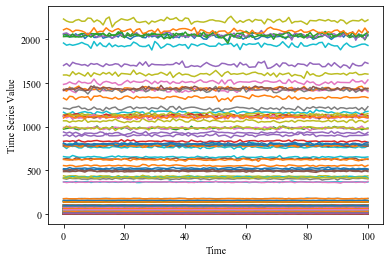

  0%|          | 1/915 [00:00<01:42,  8.90it/s]

Generating for cube


100%|██████████| 915/915 [02:17<00:00,  6.63it/s]


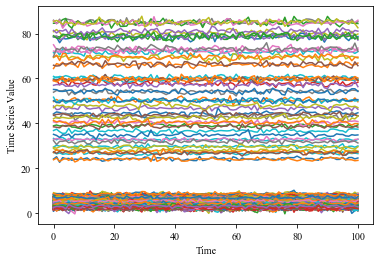

  0%|          | 1/915 [00:00<01:36,  9.52it/s]

Generating for sqt


100%|██████████| 915/915 [02:11<00:00,  6.98it/s]


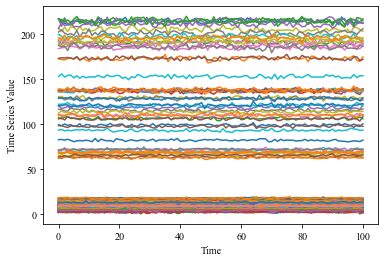

  0%|          | 1/915 [00:00<01:39,  9.18it/s]

Generating for log10


100%|██████████| 915/915 [02:24<00:00,  6.35it/s]


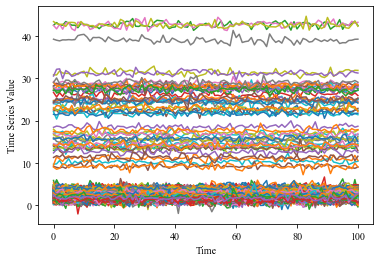

  0%|          | 0/915 [00:00<?, ?it/s]

Generating for ln


100%|██████████| 915/915 [02:14<00:00,  6.80it/s]


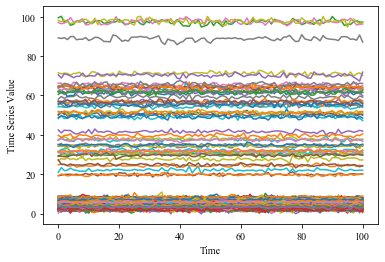

  0%|          | 1/915 [00:00<01:45,  8.63it/s]

Generating for log2


100%|██████████| 915/915 [02:23<00:00,  6.37it/s]


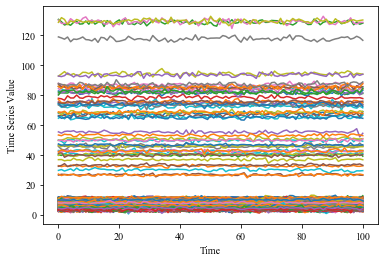

In [6]:
create_non_stationary_data('GARCH')

# T-test

In [7]:
labels = ['Raw', 'Cube Root', 'Square Root', 'Log10', 'Ln',' Log2']
xticks = range(len(labels))

def evaluate_all_datasets(model):
    trans = ['raw', 'cube', 'sqt', 'log10', 'ln', 'log2']
    dist_pairs = {}
    for t in trans:
        dh = DataHandler(data_generation=model, transformation=t)
        result = du.execute_ttest(dh.data)
        dist_pairs[t] = len(result[result['pvalue']<0.05])
    return dist_pairs

## ARol

{'raw': 81, 'cube': 35, 'sqt': 42, 'log10': 22, 'ln': 34, 'log2': 38}


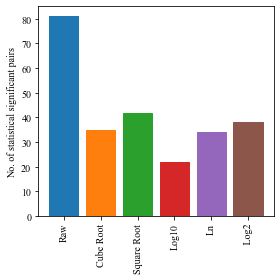

In [32]:
arol_result = evaluate_all_datasets('ARol') 
print(arol_result)
plt.figure(figsize=(4,4))
barlist = plt.bar(xticks, [arol_result['raw'], arol_result['cube'], arol_result['sqt'], arol_result['log10'], arol_result['ln'], arol_result['log2']])
barlist[1].set_color('tab:orange')
barlist[2].set_color('tab:green')
barlist[3].set_color('tab:red')
barlist[4].set_color('tab:purple')
barlist[5].set_color('tab:brown')
plt.xticks(xticks, labels, rotation=90)
plt.ylabel('No. of statistical significant pairs')
plt.tight_layout()
plt.savefig('data_analysis/04_plots/ARol_ttest.pdf')

## GARCH

{'raw': 73, 'cube': 50, 'sqt': 49, 'log10': 35, 'ln': 48, 'log2': 52}


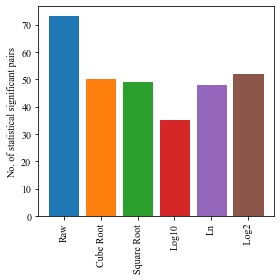

In [33]:
garch_result = evaluate_all_datasets('GARCH') 
print(garch_result)
plt.figure(figsize=(4,4))
barlist = plt.bar(xticks, [garch_result['raw'], garch_result['cube'], garch_result['sqt'], garch_result['log10'], garch_result['ln'], garch_result['log2']])
barlist[1].set_color('tab:orange')
barlist[2].set_color('tab:green')
barlist[3].set_color('tab:red')
barlist[4].set_color('tab:purple')
barlist[5].set_color('tab:brown')
plt.xticks(xticks, labels, rotation=90)
plt.ylabel('No. of statistical significant pairs')
plt.tight_layout()
plt.savefig('data_analysis/04_plots/GARCH_ttest.pdf')

## Shifted Dataset

{'raw': 667, 'cube': 672, 'sqt': 667, 'log10': 672, 'ln': 671, 'log2': 666}


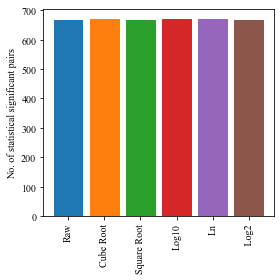

In [31]:
linear_shifted_result = evaluate_all_datasets('LinearShifted') 
print(linear_shifted_result)
plt.figure(figsize=(4,4))
barlist = plt.bar(xticks, [linear_shifted_result['raw'], linear_shifted_result['cube'], linear_shifted_result['sqt'], linear_shifted_result['log10'], linear_shifted_result['ln'], linear_shifted_result['log2']])
barlist[1].set_color('tab:orange')
barlist[2].set_color('tab:green')
barlist[3].set_color('tab:red')
barlist[4].set_color('tab:purple')
barlist[5].set_color('tab:brown')
plt.xticks(xticks, labels, rotation=90)
plt.ylabel('No. of statistical significant pairs')
plt.tight_layout()
plt.savefig('data_analysis/04_plots/LinearShifted_ttest.pdf')